In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load Dataset
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target)

In [3]:
# Membagi Dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Kita kemudian menerapkan model Decision Tree dengan kedalaman maksimum (max_depth) yang sangat rendah, yaitu 1. Model dengan kedalaman ini cenderung terlalu sederhana dan tidak mampu menangkap pola kompleks dalam data, yang sering kali menyebabkan underfitting. Model ini dilatih dengan data latih, kemudian digunakan untuk membuat prediksi pada data latih dan data uji.

In [4]:
# Model Underfitting (decission tree dengan max_depth rendah)
model_underfit = DecisionTreeClassifier(max_depth=1, random_state=42)
model_underfit.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,42
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


Terakhir, setelah model dilatih, kita menghasilkan prediksi, baik untuk data latih maupun data uji. Hasil prediksi ini akan digunakan untuk mengevaluasi kinerja model dan mengidentifikasi jika model mengalami underfitting yang ditandai dengan performa buruk pada kedua set data.

In [5]:
# Prediksi
y_train_pred_underfit = model_underfit.predict(X_train)
y_test_pred_underfit = model_underfit.predict(X_test)

# Mendeteksi Underfit

Untuk mendeteksi underfitting, kita perlu membandingkan performa model pada data latih dan data uji. Underfitting terjadi ketika model gagal menangkap pola mendalam pada data sehingga menunjukkan kinerja yang buruk dalam kedua data latih dan data uji. Ini biasanya terjadi ketika model terlalu sederhana untuk pemecahan masalah sehingga tidak mampu belajar dengan baik dari data yang tersedia.

### 1. Evaluasi performa pada data latih dan data uji

Langkah pertama dalam mendeteksi underfitting adalah mengevaluasi performa model pada data latih dan data uji. Dalam hal ini, kita menggunakan akurasi sebagai metrik untuk menilai seberapa baik model saat mengklasifikasikan data.

Untuk model underfitting, kita menghitung akurasi pada data latih dan data uji dengan kode berikut.

In [6]:
# Evaluasi performa pada data latih dan uji
train_acc_underfit = accuracy_score(y_train, y_train_pred_underfit)
test_acc_underfit = accuracy_score(y_test, y_test_pred_underfit)
 
print(f"Underfit Model Training Accuracy: {train_acc_underfit}")
print(f"Underfit Model Test Accuracy: {test_acc_underfit}")

Underfit Model Training Accuracy: 0.9246231155778895
Underfit Model Test Accuracy: 0.8947368421052632


Dari hasil ini, kita dapat melihat bahwa meskipun model memiliki akurasi yang cukup baik pada data latih (92.46%), akurasinya sedikit menurun dalam data uji (89.47%). Perbedaan ini menunjukkan bahwa model tidak terlalu menyesuaikan diri dengan data latih, tetapi juga tidak menangkap pola yang cukup baik untuk memprediksi data uji dengan akurasi lebih tinggi. Ini adalah indikasi bahwa model mengalami underfitting.

### 2, Learning Curve

Learning curve adalah alat yang berguna untuk menganalisis bahwa model Anda berperforma baik dengan berbagai ukuran data latih. Dengan learning curve, Anda bisa melihat model mengalami underfitting atau overfitting.

Dalam kasus underfitting, Anda bisa menggunakan learning curve untuk memeriksa performa model pada berbagai ukuran data latih. Berikut adalah langkah-langkah dan kode yang digunakan.

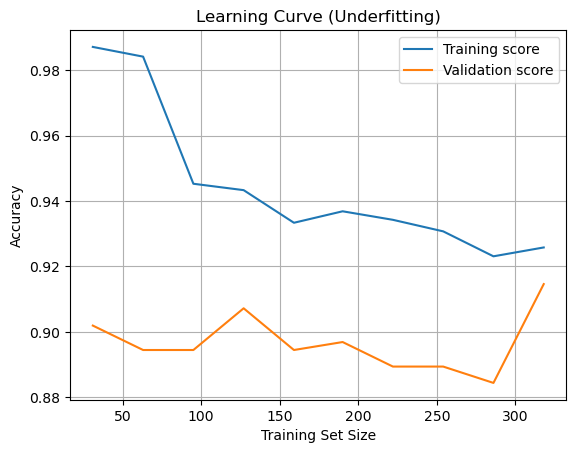

In [10]:
# Learning Curve untuk memeriksa performa pada berbagai ukuran data latih
train_sizes, train_scores, test_scores = learning_curve(model_underfit, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))
 
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
 
# Plot Learning Curve
plt.figure()
plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Validation score')
plt.ylabel('Accuracy')
plt.xlabel('Training Set Size')
plt.title('Learning Curve (Underfitting)')
plt.legend()
plt.grid(True)
plt.show()

Pada learning curve ini, Anda dapat melihat grafik yang menunjukkan perubahan akurasi model seiring dengan penambahan ukuran data latih. Pada grafik ini, ada penjelasan sebagai berikut.

Training score adalah akurasi model pada data latih.
Validation score adalah akurasi model pada data validasi (data uji).

Jika learning curve menunjukkan bahwa baik skor pelatihan maupun skor validasi tidak meningkat secara signifikan dengan bertambahnya ukuran data, ini mengindikasikan bahwa model mungkin tidak cukup kompleks untuk menangkap pola dalam data. Ini merupakan tanda underfitting. Grafik ini membantu Anda memahami bahwa model mungkin terlalu sederhana dan menunjukkan perlunya model yang lebih kompleks untuk meningkatkan performa.

### 3. Pemeriksaan Kompleksitas Model

Jika learning curve menunjukkan bahwa baik training score maupun validation score tidak meningkat secara signifikan dengan bertambahnya ukuran data, ini adalah tanda bahwa model Anda tidak cukup kompleks untuk menangkap pola-pola dalam data. Ini adalah indikasi dari underfitting bahwa model terlalu sederhana. Grafik ini membantu Anda melihat bahwa model mungkin perlu ditingkatkan agar lebih mampu menangani kompleksitas data dan meningkatkan performanya.

In [11]:
# Membandingkan dengan model yang lebih kompleks (e.g., max_depth=5)
model_complex = DecisionTreeClassifier(max_depth=5, random_state=42)
model_complex.fit(X_train, y_train)
 
y_train_pred_complex = model_complex.predict(X_train)
y_test_pred_complex = model_complex.predict(X_test)
 
train_acc_complex = accuracy_score(y_train, y_train_pred_complex)
test_acc_complex = accuracy_score(y_test, y_test_pred_complex)
 
print(f"Complex Model Training Accuracy: {train_acc_complex}")
print(f"Complex Model Test Accuracy: {test_acc_complex}")

Complex Model Training Accuracy: 0.9949748743718593
Complex Model Test Accuracy: 0.9532163742690059


Dengan menggunakan model yang lebih kompleks, yakni dengan max_depth=5, perubahan signifikan dalam hasil terlihat sebagai berikut.

- Akurasi Model Kompleks pada Data Latih: 0.995
- Akurasi Model Kompleks pada Data Uji: 0.953

Model sederhana yang mengalami underfitting sebelumnya hanya mencapai akurasi pelatihan sekitar 0.925 dan akurasi uji sekitar 0.895. Model yang lebih kompleks ini hampir mencapai akurasi sempurna pada data latih dan tetap sangat bagus dalam data uji. 

Perbedaan besar ini menunjukkan bahwa model yang lebih kompleks dapat menangkap pola data dengan lebih baik dan memperbaiki masalah underfitting pada model yang lebih sederhana. Dengan demikian, jika model Anda terasa terlalu sederhana, pertimbangkan untuk mencoba model yang lebih kompleks guna meningkatkan performa, ya!

# Mengatasi Underfitting

Mengatasi underfitting adalah kunci untuk meningkatkan performa model yang tidak cukup menangkap pola dalam data. Ini sering terlihat dari hasil akurasi yang rendah, baik pada data latih maupun data uji. Underfitting terjadi ketika model terlalu sederhana untuk memodelkan hubungan yang kompleks dalam data sehingga menghasilkan prediksi kurang akurat. 

Dalam mengatasi underfitting, tujuan kita adalah menyempurnakan model sehingga dapat menangkap pola-pola yang ada dengan lebih baik. Berbagai teknik dapat digunakan untuk meningkatkan kapasitas model dan performanya. 

Di bawah ini, kita akan menjelaskan beberapa metode yang bisa diterapkan untuk mengatasi underfitting dan meningkatkan kemampuan model dalam memprediksi data secara lebih efektif.

### 1. Gunakan Model yang Lebih Kompleks

Ketika Anda menghadapi masalah underfitting, salah satu langkah pertama yang bisa dicoba adalah menggunakan model lebih kompleks. Underfitting terjadi ketika model terlalu sederhana dan tidak dapat menangkap pola dalam data sehingga hasil prediksinya kurang optimal, baik pada data latih maupun data uji.

Sebelumnya, hasil akurasi model underfitting adalah berikut.

- Akurasi Training Underfitting: 0.9246
- Akurasi Test Underfitting: 0.8947

Untuk mengatasi masalah ini, Anda bisa meningkatkan kompleksitas model. Dalam contoh ini, kita menggunakan model DecisionTreeClassifier dengan parameter max_depth yang lebih besar, yaitu 10. Ini memberikan kapasitas yang lebih besar pada model dan memungkinkan model untuk menangkap lebih banyak pola dalam data.

Berikut adalah kode untuk melatih dan mengevaluasi model yang lebih kompleks.

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
 
# Menggunakan model yang lebih kompleks dengan max_depth lebih besar
complex_model = DecisionTreeClassifier(max_depth=10, random_state=42)
complex_model.fit(X_train, y_train)
 
# Prediksi pada data latih dan uji
y_train_pred_complex = complex_model.predict(X_train)
y_test_pred_complex = complex_model.predict(X_test)
 
# Evaluasi performa
train_acc_complex = accuracy_score(y_train, y_train_pred_complex)
test_acc_complex = accuracy_score(y_test, y_test_pred_complex)
 
print(f"Training Accuracy (Complex Model): {train_acc_complex}")
print(f"Test Accuracy (Complex Model): {test_acc_complex}")

Training Accuracy (Complex Model): 1.0
Test Accuracy (Complex Model): 0.9415204678362573


Dengan menggunakan model yang lebih kompleks, Anda akan melihat peningkatan signifikan dalam akurasi, baik pada data latih maupun data uji. Ini menunjukkan bahwa model sekarang lebih mampu menangkap pola data dan mengatasi masalah underfitting yang sebelumnya ada.

### 2. Tambahkan lebih banyak fitur (Feature Engineering dengan PCA)

Metode kedua untuk mengatasi underfitting adalah menambahkan lebih banyak fitur ke dalam model melalui teknik feature engineering. Salah satu cara untuk melakukannya adalah menggunakan principal component analysis (PCA). 

PCA adalah teknik untuk mereduksi dimensi data sambil mempertahankan informasi yang paling penting. Dengan menghasilkan fitur baru dari data asli, PCA dapat membantu model dalam memahami pola yang lebih kompleks.

Sebelumnya, hasil akurasi model underfitting sebagai berikut.

- Akurasi Training Underfitting: 0.9246
- Akurasi Test Underfitting: 0.8947

Dalam mencoba pendekatan ini, pertama-tama kita normalisasi data dengan StandardScaler, kemudian menerapkan PCA untuk menghasilkan fitur baru dari data yang telah dinormalisasi. Setelah itu, kita melatih model DecisionTreeClassifier yang sama dengan parameter max_depth 10 menggunakan fitur hasil PCA.

Berikut adalah langkah-langkah dan kode untuk menerapkan PCA.

In [13]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
 
# Normalisasi data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
 
# PCA untuk mengurangi dimensi atau menghasilkan fitur baru
pca = PCA(n_components=5)  # Menghasilkan fitur baru dari data asli
X_pca = pca.fit_transform(X_scaled)
 
# Membagi data menjadi data latih dan data uji
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.3, random_state=42)
 
# Model dengan fitur hasil PCA
complex_model_pca = DecisionTreeClassifier(max_depth=10, random_state=42)
complex_model_pca.fit(X_train_pca, y_train_pca)
 
# Prediksi pada data latih dan uji
y_train_pred_pca = complex_model_pca.predict(X_train_pca)
y_test_pred_pca = complex_model_pca.predict(X_test_pca)
 
# Evaluasi performa
train_acc_pca = accuracy_score(y_train_pca, y_train_pred_pca)
test_acc_pca = accuracy_score(y_test_pca, y_test_pred_pca)
 
print(f"Training Accuracy (PCA): {train_acc_pca}")
print(f"Test Accuracy (PCA): {test_acc_pca}")

Training Accuracy (PCA): 1.0
Test Accuracy (PCA): 0.9415204678362573


Dengan menerapkan PCA serta menambahkan fitur baru, kita bisa melihat bahwa akurasi model pada data latih dan data uji meningkat secara signifikan. Ini menunjukkan bahwa model sekarang lebih mampu menangkap pola-pola kompleks dalam data sehingga mengurangi masalah underfitting yang ada sebelumnya.

### 3. Hyperparameter Tuning Menggunakan GridSearchCV

Langkah ketiga untuk mengatasi underfitting adalah melakukan hyperparameter tuning pada model. Hyperparameter tuning adalah proses mencari kombinasi terbaik dari parameter model untuk meningkatkan kinerja model. Salah satu alat yang berguna untuk tugas ini adalah GridSearchCV. Ini memungkinkan kita mengeksplorasi berbagai kombinasi hyperparameter secara sistematis.

Sebelumnya, hasil akurasi model underfitting adalah berikut.

- Akurasi Training Underfitting: 0.9246
- Akurasi Test Underfitting: 0.8947

Dengan GridSearchCV, kita dapat mencari parameter terbaik untuk model DecisionTreeClassifier. Kita menentukan grid pencarian untuk hyperparameter, seperti max_depth,` min_samples_split`, dan min_samples_leaf. Proses ini melibatkan evaluasi berbagai kombinasi parameter menggunakan teknik cross-validation untuk menemukan konfigurasi yang optimal.

Berikut adalah kode untuk melakukan hyperparameter tuning.

In [14]:
from sklearn.model_selection import GridSearchCV
 
# Grid Search untuk hyperparameter tuning
param_grid = {
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
 
grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid, cv=5, scoring='accuracy')
 
# Melakukan pencarian hyperparameter terbaik
grid_search.fit(X_train, y_train)
 
# Hyperparameter terbaik
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_
 
# Prediksi dengan model terbaik
y_train_pred_best = best_model.predict(X_train)
y_test_pred_best = best_model.predict(X_test)
 
# Evaluasi performa
train_acc_best = accuracy_score(y_train, y_train_pred_best)
test_acc_best = accuracy_score(y_test, y_test_pred_best)
 
print(f"Training Accuracy (Best Model): {train_acc_best}")
print(f"Test Accuracy (Best Model): {test_acc_best}")
print(f"Best Params: {best_params}")

Training Accuracy (Best Model): 0.9949748743718593
Test Accuracy (Best Model): 0.9532163742690059
Best Params: {'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}


Dengan melakukan hyperparameter tuning, kita bisa melihat peningkatan signifikan dalam akurasi model pada data latih dan data uji. Ini menunjukkan bahwa model kini lebih sesuai dengan data dan dapat menangani pola yang lebih kompleks serta mengatasi masalah underfitting sebelumnya.

### 4. Perbaiki Prprocessing Data

Langkah keempat dalam mengatasi underfitting adalah memperbaiki preprocessing data. Preprocessing yang baik sangat penting karena dapat memengaruhi kinerja model secara signifikan. Salah satu teknik penting adalah normalisasi data. Ini memastikan bahwa fitur memiliki skala yang sama sehingga model dapat belajar dengan lebih efektif.

Sebelumnya, hasil akurasi model underfitting adalah berikut.

- Akurasi Training Underfitting: 0.9246
- Akurasi Test Underfitting: 0.8947

Untuk meningkatkan performa model, kita melakukan normalisasi ulang pada data. Anda bisa menggunakan StandardScaler untuk menstandardisasi fitur sehingga memiliki rata-rata 0 dan standar deviasi 1. Setelah itu, kita membagi data menjadi data latih dan data uji, kemudian melatih model DecisionTreeClassifier dengan parameter max_depth yang lebih besar.

Berikut adalah kode untuk preprocessing ulang dan evaluasi model.

In [15]:
# Melakukan normalisasi ulang dengan scaler
scaler = StandardScaler()
X_scaled_new = scaler.fit_transform(X)
 
# Membagi ulang data latih dan uji
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled_new, y, test_size=0.3, random_state=42)
 
# Model setelah preprocessing data lebih baik
model_after_scaling = DecisionTreeClassifier(max_depth=10, random_state=42)
model_after_scaling.fit(X_train_scaled, y_train_scaled)
 
# Prediksi
y_train_pred_scaled = model_after_scaling.predict(X_train_scaled)
y_test_pred_scaled = model_after_scaling.predict(X_test_scaled)
 
# Evaluasi performa
train_acc_scaled = accuracy_score(y_train_scaled, y_train_pred_scaled)
test_acc_scaled = accuracy_score(y_test_scaled, y_test_pred_scaled)
 
print(f"Training Accuracy (After Scaling): {train_acc_scaled}")
print(f"Test Accuracy (After Scaling): {test_acc_scaled}")

Training Accuracy (After Scaling): 1.0
Test Accuracy (After Scaling): 0.9415204678362573


Dengan perbaikan preprocessing data, kita melihat bahwa akurasi model pada data latih tetap tinggi dan akurasi dalam data uji juga meningkat. Ini menunjukkan bahwa preprocessing yang lebih baik membantu model untuk belajar lebih efektif dan memberikan performa lebih baik serta mengatasi masalah underfitting sebelumnya.

### 5. Tambahkan Data Latih

Langkah kelima untuk mengatasi underfitting adalah menambahkan lebih banyak data latih. Dengan meningkatkan jumlah data latih, model memiliki lebih banyak informasi untuk belajar dan dapat meningkatkan kemampuannya dalam mengenali pola yang lebih kompleks.

Sebelumnya, hasil akurasi model underfitting adalah berikut.

- Akurasi Training Underfitting: 0.9246
- Akurasi Test Underfitting: 0.8947

Untuk memperbaiki performa model, kita dapat memperbesar ukuran data latih. Kita membagi ulang data dengan meningkatkan proporsi data latih dan mengurangi ukuran data uji. Kemudian, kita melatih model DecisionTreeClassifier dengan parameter max_depth lebih besar menggunakan data latih yang lebih besar.

Berikut adalah kode untuk menambah data latih dan evaluasi model.

In [16]:
# Membagi ulang data dengan lebih banyak data latih (menambah ukuran training set)
X_train_more_data, X_test_less_data, y_train_more_data, y_test_less_data = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
 
# Model dengan lebih banyak data latih
model_more_data = DecisionTreeClassifier(max_depth=10, random_state=42)
model_more_data.fit(X_train_more_data, y_train_more_data)
 
# Prediksi
y_train_pred_more_data = model_more_data.predict(X_train_more_data)
y_test_pred_more_data = model_more_data.predict(X_test_less_data)
 
# Evaluasi performa
train_acc_more_data = accuracy_score(y_train_more_data, y_train_pred_more_data)
test_acc_more_data = accuracy_score(y_test_less_data, y_test_pred_more_data)
 
print(f"Training Accuracy (More Data): {train_acc_more_data}")
print(f"Test Accuracy (More Data): {test_acc_more_data}")

Training Accuracy (More Data): 1.0
Test Accuracy (More Data): 0.9473684210526315


Dengan menambah ukuran data latih, akurasi model dalam data latih tetap tinggi dan akurasi pada data uji juga mengalami peningkatan. Ini menunjukkan bahwa dengan data latih yang lebih banyak, model dapat menangkap pola lebih kompleks dan memberikan performa lebih baik. Ini membantu mengatasi masalah underfitting yang ada sebelumnya.